In [1]:
from river import metrics, forest, tree, drift, stream, evaluate
from river.evaluate import progressive_val_score
from Oespl import OESPL
import pandas as pd 

In [18]:
oespl = OESPL(
    base_estimator=tree.HoeffdingTreeRegressor(),
    ensemble_size=3,
    lambda_fixed=6.0,
    seed=42,
    drift_detector=drift.ADWIN(),
    patience=1000,
    awakening=500,
    reset_model=True
)



df = pd.read_csv(r'C:\Users\franc\Desktop\TESI\SML_thesis_line_follower_robot\e-puck\data\data\sensors_data\sensors_data.csv')

column_names = df.drop('target',axis=1).columns



## Evaluate the model

In [3]:

streams = stream.iter_pandas(X=df[column_names],y=df['target'])

metric = metrics.MAE()


In [4]:
progressive_val_score(
    dataset=streams,
    model=forest.ARFRegressor(),
    metric=metric,
    print_every=1000)

[1,000] MAE: 38,455.471798
[2,000] MAE: 19,228.888174
[3,000] MAE: 12,820.568044
[4,000] MAE: 9,618.071166
[5,000] MAE: 7,695.530663
[6,000] MAE: 6,413.821973
[7,000] MAE: 5,497.979602
[7,222] MAE: 5,328.995795


MAE: 5,328.995795

In [19]:
metric = metrics.MAE()

In [20]:
mae_values = []
for _, row in df.iterrows():
    x = {col: row[col] for col in df.columns if col != 'target'}
    y = row['target']
    y_p = oespl.predict_one(x)   
    if y_p is not None:
        metric.update(y_true=y, y_pred=y_p)
    oespl.learn_one(x, y)
    mae_values.append(metric.get())
    
    
print(metric)
    


MAE: 19.750532


In [21]:
import matplotlib.pyplot as plt 

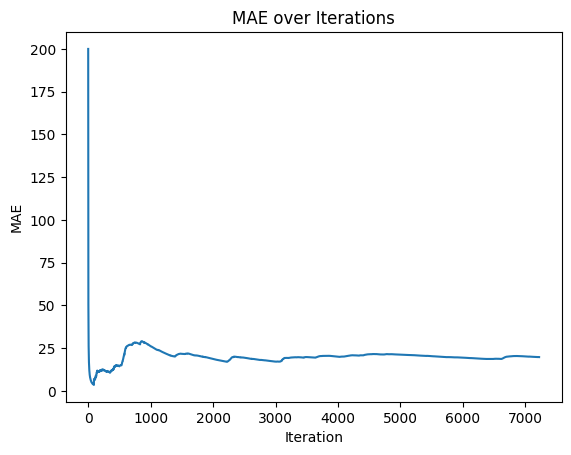

In [22]:
plt.plot(mae_values)
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('MAE over Iterations')
plt.show()